In [30]:
%matplotlib notebook
import numpy as np 
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import matplotlib.animation as anim

In [31]:
m=0.1
r=0.1
d=0.3
g=9.81
psi_punto=400
theta0=(np.pi)/4
t=np.linspace(0,8,10000)
y0 = np.array([0, 0, (np.pi) / 4, 0])

In [32]:
def System(y, t, m, r, d, g, psi_punto, theta0):
    
    phi = y[0]
    psi = y[1]
    theta = y[2]
    theta_punto = y[3]
    
    I_z = 0.5 * m * r ** 2
    I_0 = 0.25 * m * r ** 2 + m * d ** 2
    
    phi_punto = (I_z * psi_punto * (np.cos(theta0) - np.cos(theta))) / (I_0 * np.sin(theta) ** 2 + I_z * np.cos(theta) ** 2)
    theta_doble_punto = ((phi_punto ** 2) * np.sin(theta) * np.cos(theta) * (I_0 - I_z) - phi_punto * psi_punto * I_z * np.sin(theta) + m * g * d * np.sin(theta)) / I_0
    
    return [phi_punto, psi_punto, theta_punto, theta_doble_punto]

In [33]:
integracion = odeint(System, y0, t, args=(m, r, d, g, psi_punto, theta0))

In [34]:
psi=integracion[:,0]
phi=integracion[:,1]
theta=integracion[:,2]
theta_punto=integracion[:,3]


Punto e


<IPython.core.display.Javascript object>


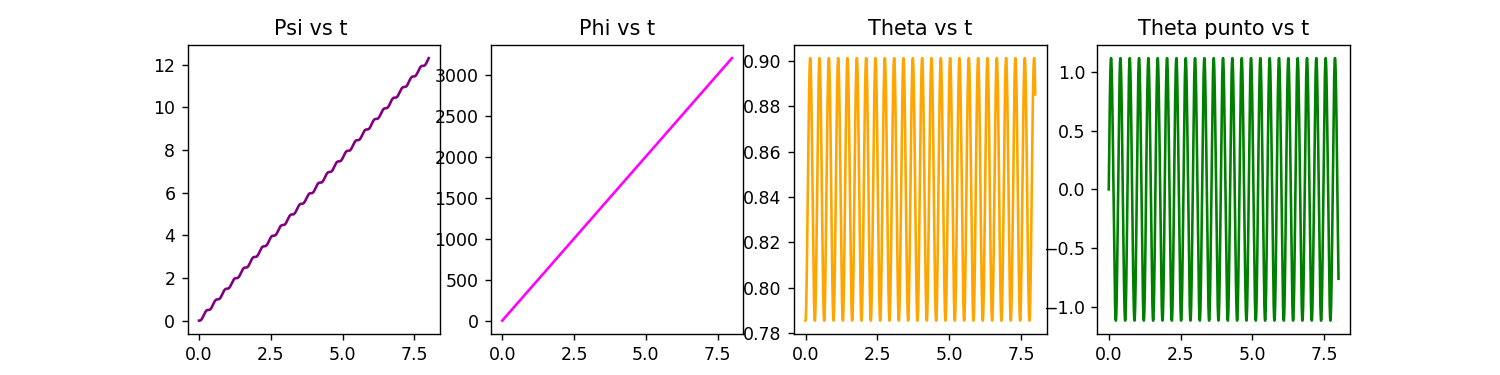

Text(0.5, 1.0, 'Theta punto vs t')

In [35]:
print("Punto e")

fig=plt.figure(figsize=(12,3))

ax=fig.add_subplot(141)
ax1=fig.add_subplot(142)
ax2=fig.add_subplot(143)
ax3=fig.add_subplot(144)

ax.plot(t,psi,color="purple")
ax1.plot(t,phi,color="magenta")
ax2.plot(t,theta,color="orange")
ax3.plot(t,theta_punto,color="green")

ax.set_title('Psi vs t ')
ax1.set_title('Phi vs t')
ax2.set_title('Theta vs t')
ax3.set_title('Theta punto vs t')

Punto f


<IPython.core.display.Javascript object>


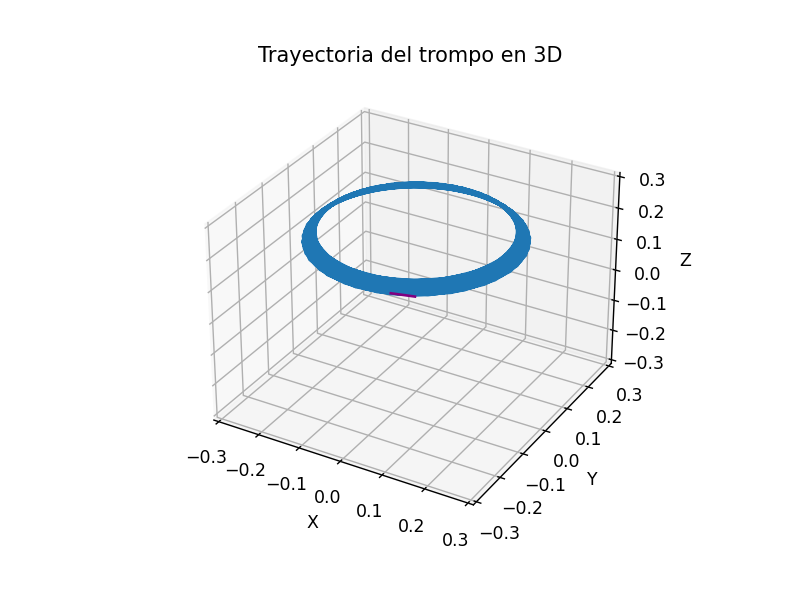

In [36]:
print("Punto f")

x = d * np.sin(theta) * np.cos(phi)
y = d * np.sin(theta) * np.sin(phi)
z = d * np.cos(theta)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-d, d])
ax.set_ylim([-d, d])
ax.set_zlim([-d, d])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Trayectoria del trompo en 3D')


arrow = ax.quiver(0, 0, 0, 0, 0, d, color='purple', arrow_length_ratio=0.1)

line, = ax.plot([], [], [], lw=2)

def init():
    line.set_data([], [])
    line.set_3d_properties([])
    arrow.set_segments([])
    return line,

def animate(i):
    line.set_data(x[:i], y[:i])
    line.set_3d_properties(z[:i])
    arrow.set_segments([[[0, 0, 0], [x[i], y[i], z[i]]]])
    return line,

ani = anim.FuncAnimation(fig, animate, frames=len(t), init_func=init, interval=20, blit=True)

plt.show()


In [37]:
precession_rate = (psi[-1] - psi[0]) / (t[-1] - t[0])

print("Velocidad de precesión:", precession_rate, "rad/s")

Velocidad de precesión: 1.538509624765622 rad/s
